# Fire Prediction

In [70]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
df = pd.read_csv('forestfires.csv')
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [71]:
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [72]:
for i in range(0, len(df)):
    x = df['area'][i]
    if(x == 0.0):
        df['area'][i] = int(0)
    else:
        df['area'][i] = int(1)
    #//print(df['area'][i])
    
    y = df['rain'][i]
    if(y == 0.0):
        df['rain'][i] = int(0)
    else:
        df['rain'][i] = int(1)
    #print(df['rain'][i])
    
    y = df['month'][i]
    if(y== 'jan'):
        df['month'][i] = int(1)
    elif(y== 'feb'):
        df['month'][i] = int(2)
    elif(y== 'mar'):
        df['month'][i] = int(3)
    elif(y== 'apr'):
        df['month'][i] = int(4)
    elif(y== 'may'):
        df['month'][i] = int(5)
    elif(y== 'jun'):
        df['month'][i] = int(6)
    elif(y== 'jul'):
        df['month'][i] = int(7)
    elif(y== 'aug'):
        df['month'][i] = int(8)
    elif(y== 'sep'):
        df['month'][i] = int(9)
    elif(y== 'oct'):
        df['month'][i] = int(10)
    elif(y== 'nov'):
        df['month'][i] = int(11)
    else:
        df['month'][i] = int(12)
    

C:\Users\Samprat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Samprat\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Samprat\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [73]:
numeric_features = ['FFMC','DMC','DC','ISI','temp','RH','wind']
cat_features = ['month','rain','area']

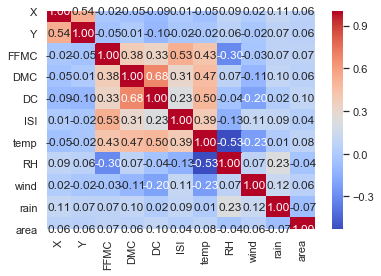

In [74]:
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
g

In [75]:
df.drop(labels=["X","Y","day"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(df.head())

In [76]:
X = df.drop(["area"],axis = 1)

Dataset with Dropped Labels
  month  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0     3  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1    10  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2    10  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3     3  91.7  33.3   77.5  9.0   8.3  97   4.0   1.0   0.0
4     3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [77]:
X

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,1.0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...
512,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,8,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [78]:
Y = df['area']
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
512    1.0
513    1.0
514    1.0
515    0.0
516    0.0
Name: area, Length: 517, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
classifier = Sequential()
classifier.add(Dense(units = 9, activation='relu', input_shape =(9, )))

classifier.add(Dense(units = 64, activation='relu'))

#classifier.add(Dense(units = 3, activation='relu', kernel_initializer = 'random_normal'))

#classifier.add(Dense(units = 13, activation='relu', kernel_initializer = 'random_normal'))

classifier.add(Dense(units = 64, activation='relu'))

classifier.add(Dense(units = 1, activation='sigmoid'))

#classifier.add(LeakyReLU(alpha=0.1))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, validation_split=0.3, batch_size = 16, epochs = 500)

Train on 289 samples, validate on 124 samples
Epoch 1/500
289/289 [==============================] - 2s 5ms/step - loss: 0.7051 - acc: 0.5087 - val_loss: 0.7086 - val_acc: 0.5403
Epoch 2/500
289/289 [==============================] - 0s 225us/step - loss: 0.6993 - acc: 0.5087 - val_loss: 0.7067 - val_acc: 0.5081
Epoch 3/500
289/289 [==============================] - 0s 184us/step - loss: 0.6959 - acc: 0.5225 - val_loss: 0.7041 - val_acc: 0.4758
Epoch 4/500
289/289 [==============================] - 0s 170us/step - loss: 0.6917 - acc: 0.5363 - val_loss: 0.7032 - val_acc: 0.4677
Epoch 5/500
289/289 [==============================] - 0s 201us/step - loss: 0.6893 - acc: 0.5363 - val_loss: 0.7028 - val_acc: 0.4597
Epoch 6/500
289/289 [==============================] - 0s 218us/step - loss: 0.6887 - acc: 0.5294 - val_loss: 0.7029 - val_acc: 0.4597
Epoch 7/500
289/289 [==============================] - 0s 249us/step - loss: 0.6882 - acc: 0.5294 - val_loss: 0.7023 - val_acc: 0.4677
Epoch 8/500

Epoch 61/500
289/289 [==============================] - 0s 190us/step - loss: 0.6657 - acc: 0.5917 - val_loss: 0.7045 - val_acc: 0.5161
Epoch 62/500
289/289 [==============================] - 0s 190us/step - loss: 0.6653 - acc: 0.6125 - val_loss: 0.7052 - val_acc: 0.5000
Epoch 63/500
289/289 [==============================] - 0s 208us/step - loss: 0.6651 - acc: 0.5986 - val_loss: 0.7060 - val_acc: 0.5242
Epoch 64/500
289/289 [==============================] - 0s 173us/step - loss: 0.6647 - acc: 0.6090 - val_loss: 0.7063 - val_acc: 0.5081
Epoch 65/500
289/289 [==============================] - 0s 173us/step - loss: 0.6643 - acc: 0.5986 - val_loss: 0.7070 - val_acc: 0.4919
Epoch 66/500
289/289 [==============================] - 0s 166us/step - loss: 0.6643 - acc: 0.5986 - val_loss: 0.7073 - val_acc: 0.4839
Epoch 67/500
289/289 [==============================] - 0s 170us/step - loss: 0.6642 - acc: 0.5882 - val_loss: 0.7068 - val_acc: 0.5403
Epoch 68/500
289/289 [==========================

289/289 [==============================] - 0s 263us/step - loss: 0.6470 - acc: 0.6401 - val_loss: 0.7065 - val_acc: 0.5242
Epoch 122/500
289/289 [==============================] - 0s 274us/step - loss: 0.6460 - acc: 0.6367 - val_loss: 0.7067 - val_acc: 0.5484
Epoch 123/500
289/289 [==============================] - 0s 274us/step - loss: 0.6464 - acc: 0.6298 - val_loss: 0.7069 - val_acc: 0.5242
Epoch 124/500
289/289 [==============================] - 0s 166us/step - loss: 0.6470 - acc: 0.6401 - val_loss: 0.7080 - val_acc: 0.5403
Epoch 125/500
289/289 [==============================] - 0s 194us/step - loss: 0.6458 - acc: 0.6401 - val_loss: 0.7086 - val_acc: 0.5484
Epoch 126/500
289/289 [==============================] - 0s 180us/step - loss: 0.6451 - acc: 0.6401 - val_loss: 0.7082 - val_acc: 0.5484
Epoch 127/500
289/289 [==============================] - 0s 170us/step - loss: 0.6446 - acc: 0.6263 - val_loss: 0.7074 - val_acc: 0.5081
Epoch 128/500
289/289 [==============================] 

Epoch 181/500
289/289 [==============================] - 0s 249us/step - loss: 0.6226 - acc: 0.6367 - val_loss: 0.7123 - val_acc: 0.5565
Epoch 182/500
289/289 [==============================] - 0s 242us/step - loss: 0.6222 - acc: 0.6471 - val_loss: 0.7131 - val_acc: 0.5565
Epoch 183/500
289/289 [==============================] - 0s 235us/step - loss: 0.6221 - acc: 0.6298 - val_loss: 0.7089 - val_acc: 0.5161
Epoch 184/500
289/289 [==============================] - 0s 242us/step - loss: 0.6214 - acc: 0.6332 - val_loss: 0.7117 - val_acc: 0.5403
Epoch 185/500
289/289 [==============================] - 0s 253us/step - loss: 0.6209 - acc: 0.6436 - val_loss: 0.7126 - val_acc: 0.5565
Epoch 186/500
289/289 [==============================] - 0s 267us/step - loss: 0.6209 - acc: 0.6436 - val_loss: 0.7092 - val_acc: 0.5081
Epoch 187/500
289/289 [==============================] - 0s 263us/step - loss: 0.6206 - acc: 0.6401 - val_loss: 0.7082 - val_acc: 0.5081
Epoch 188/500
289/289 [==================

Epoch 241/500
289/289 [==============================] - 0s 308us/step - loss: 0.6001 - acc: 0.6713 - val_loss: 0.7033 - val_acc: 0.5242
Epoch 242/500
289/289 [==============================] - 0s 204us/step - loss: 0.5982 - acc: 0.6713 - val_loss: 0.7041 - val_acc: 0.5323
Epoch 243/500
289/289 [==============================] - 0s 204us/step - loss: 0.5982 - acc: 0.6678 - val_loss: 0.7039 - val_acc: 0.5323
Epoch 244/500
289/289 [==============================] - 0s 274us/step - loss: 0.5982 - acc: 0.6747 - val_loss: 0.7111 - val_acc: 0.5242
Epoch 245/500
289/289 [==============================] - 0s 256us/step - loss: 0.5989 - acc: 0.6747 - val_loss: 0.7063 - val_acc: 0.5323
Epoch 246/500
289/289 [==============================] - 0s 246us/step - loss: 0.5969 - acc: 0.6851 - val_loss: 0.7078 - val_acc: 0.5161
Epoch 247/500
289/289 [==============================] - 0s 253us/step - loss: 0.5957 - acc: 0.6782 - val_loss: 0.7066 - val_acc: 0.5161
Epoch 248/500
289/289 [==================

Epoch 301/500
289/289 [==============================] - 0s 177us/step - loss: 0.5801 - acc: 0.6990 - val_loss: 0.7058 - val_acc: 0.5726
Epoch 302/500
289/289 [==============================] - 0s 187us/step - loss: 0.5769 - acc: 0.6782 - val_loss: 0.7226 - val_acc: 0.5645
Epoch 303/500
289/289 [==============================] - 0s 184us/step - loss: 0.5843 - acc: 0.6920 - val_loss: 0.7080 - val_acc: 0.5565
Epoch 304/500
289/289 [==============================] - 0s 180us/step - loss: 0.5760 - acc: 0.6920 - val_loss: 0.7113 - val_acc: 0.5806
Epoch 305/500
289/289 [==============================] - 0s 197us/step - loss: 0.5745 - acc: 0.7024 - val_loss: 0.7130 - val_acc: 0.5968
Epoch 306/500
289/289 [==============================] - 0s 218us/step - loss: 0.5736 - acc: 0.6990 - val_loss: 0.7051 - val_acc: 0.5645
Epoch 307/500
289/289 [==============================] - 0s 187us/step - loss: 0.5740 - acc: 0.6955 - val_loss: 0.7096 - val_acc: 0.5806
Epoch 308/500
289/289 [==================

Epoch 361/500
289/289 [==============================] - 0s 177us/step - loss: 0.5543 - acc: 0.7197 - val_loss: 0.7115 - val_acc: 0.5806
Epoch 362/500
289/289 [==============================] - 0s 166us/step - loss: 0.5543 - acc: 0.7059 - val_loss: 0.7103 - val_acc: 0.5806
Epoch 363/500
289/289 [==============================] - 0s 204us/step - loss: 0.5538 - acc: 0.7093 - val_loss: 0.7032 - val_acc: 0.5645
Epoch 364/500
289/289 [==============================] - 0s 163us/step - loss: 0.5511 - acc: 0.7024 - val_loss: 0.7035 - val_acc: 0.5645
Epoch 365/500
289/289 [==============================] - 0s 180us/step - loss: 0.5512 - acc: 0.7266 - val_loss: 0.7079 - val_acc: 0.5645
Epoch 366/500
289/289 [==============================] - 0s 166us/step - loss: 0.5503 - acc: 0.7197 - val_loss: 0.7120 - val_acc: 0.5484
Epoch 367/500
289/289 [==============================] - 0s 163us/step - loss: 0.5521 - acc: 0.7336 - val_loss: 0.7089 - val_acc: 0.5484
Epoch 368/500
289/289 [==================

Epoch 421/500
289/289 [==============================] - 0s 315us/step - loss: 0.5281 - acc: 0.7197 - val_loss: 0.7148 - val_acc: 0.5968
Epoch 422/500
289/289 [==============================] - 0s 298us/step - loss: 0.5277 - acc: 0.7439 - val_loss: 0.7338 - val_acc: 0.6048
Epoch 423/500
289/289 [==============================] - 0s 294us/step - loss: 0.5264 - acc: 0.7128 - val_loss: 0.7145 - val_acc: 0.5968
Epoch 424/500
289/289 [==============================] - 0s 319us/step - loss: 0.5267 - acc: 0.7336 - val_loss: 0.7171 - val_acc: 0.5968
Epoch 425/500
289/289 [==============================] - 0s 294us/step - loss: 0.5250 - acc: 0.7301 - val_loss: 0.7169 - val_acc: 0.5887
Epoch 426/500
289/289 [==============================] - 0s 315us/step - loss: 0.5273 - acc: 0.7163 - val_loss: 0.7367 - val_acc: 0.5887
Epoch 427/500
289/289 [==============================] - 0s 294us/step - loss: 0.5242 - acc: 0.7336 - val_loss: 0.7304 - val_acc: 0.6048
Epoch 428/500
289/289 [==================

Epoch 481/500
289/289 [==============================] - 0s 194us/step - loss: 0.5022 - acc: 0.7439 - val_loss: 0.7386 - val_acc: 0.5887
Epoch 482/500
289/289 [==============================] - 0s 274us/step - loss: 0.4997 - acc: 0.7543 - val_loss: 0.7419 - val_acc: 0.5806
Epoch 483/500
289/289 [==============================] - 0s 298us/step - loss: 0.4988 - acc: 0.7647 - val_loss: 0.7185 - val_acc: 0.5806
Epoch 484/500
289/289 [==============================] - 0s 267us/step - loss: 0.5185 - acc: 0.7439 - val_loss: 0.7227 - val_acc: 0.6129
Epoch 485/500
289/289 [==============================] - 0s 284us/step - loss: 0.4976 - acc: 0.7647 - val_loss: 0.7387 - val_acc: 0.6129
Epoch 486/500
289/289 [==============================] - 0s 267us/step - loss: 0.4999 - acc: 0.7370 - val_loss: 0.7362 - val_acc: 0.5887
Epoch 487/500
289/289 [==============================] - 0s 274us/step - loss: 0.5029 - acc: 0.7474 - val_loss: 0.7330 - val_acc: 0.5806
Epoch 488/500
289/289 [==================

In [99]:
p = classifier.predict(X_test)

In [139]:
v = [0]*len(p)
for i in range(0,len(p)):
    x = p[i]
    if x >= 0.375:
        v[i] = 1
    else:
        v[i] = 0


In [140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,v))

0.6153846153846154
